#  Barclays x GA: Python Day 4 Solutions

---

## <font color='red'> Exercise: Coronavirus symptom prediction
    
A group at King’s College London has released a coronavirus symptom tracker app. Every day, millions of people in the UK enter their symptoms (or lack of symptoms) into the app, together with information about their age, gender and other characteristics.

https://covid.joinzoe.com/
    
The researchers have used this to build a model that predicts the probability that a person has coronavirus, using information about their gender, age and symptoms.
    
Let’s take a look at the detail behind this press release from King’s College London to understand exactly how the model works and how accurate it is

https://covid.joinzoe.com/post/detecting-covid-without-a-test
    
Have a read through the Nature paper published by the King’s College group: https://www.nature.com/articles/s41591-020-0916-2
    
* Can you find the equation that describes the model? 
* Is the equation easy to understand? 
* Where does ‘AI’ come into the process?
    
Your challenge is to **implement this predictive model in Python**.
    
Write a function called `corona_predictor` that takes the following inputs:
    
* Sex (`1` if the person is male, `0` if female)
* Age
* Whether a person has lost their sense of taste (`1` if they have the symptom, `0` if not)
* Whether a person has severe fatigue (`1` if they have the symptom, `0` if not)
* Whether a person has a severe or persistent cough (`1` if they have the symptom, `0` if not)
* Whether a person has skipped meals (`1` if they have the symptom, `0` if not)
    
And prints out the person's **probability of having coronavirus** as the output. Test out your function on the following personas:
    
    
1. A 55 year old man who has severe fatigue but no other symptoms.
2. A 78 year old woman with a severe cough, who has lost her sense of taste.
3. A 22 year old man with no sense of taste, severe fatigue, and has skipped meals.


In [1]:
import math

# you could approximate "e" if you wanted e.g.:
# e = 2.718

def corona_predictor(sex, age, loss_of_taste, fatigue, cough, skipped_meals):
    # if you wanted to you could check to make sure the 0 or 1 inputs are actually just 0 or 1
    if sex not in [0, 1]:
        raise ValueError("sex must be 0 or 1")
    # and so on...
    
    # z will be the multiplications of each input by the coefficients
    z = -1.32 + (-0.01 * age) + (0.44 * sex) + (1.75 * loss_of_taste) + (0.31 * cough) \
    # note the backslash to split this command over two rows
    + (0.49 * fatigue) + (0.39 * skipped_meals)
    
    # now the formula is e^z/(1 + e^z)
    return (math.e**z) / (1 + (math.e**z))

Test the function

In [2]:
# running the below will error
# corona_predictor(sex=2, age=55, loss_of_taste=0, fatigue=1, cough=0, skipped_meals=0)

In [3]:
# 55 year old man, loss of taste
corona_predictor(sex=1, age=55, loss_of_taste=0, fatigue=1, cough=0, skipped_meals=0)

In [4]:
# 78 year old woman with a severe cough, who has lost her sense of taste
corona_predictor(sex=0, age=78, loss_of_taste=1, fatigue=0, cough=1, skipped_meals=0)

In [5]:
# 22 year old man with no sense of taste, severe fatigue, and has skipped meals
corona_predictor(sex=1, age=22, loss_of_taste=1, fatigue=1, cough=0, skipped_meals=1)

## <font color='red'> Exercise: Linear regression with multiple features
    
Now let's use both features in our dataset to run our linear regression model. Now, the equation we're trying to fit looks like:

`house price = a0 + a1*internal area + a2*bedrooms`

Fill in the gaps in the code below to fit and evaluate the model.

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression # import
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

house_df = pd.DataFrame({'house_price':[440000, 200000, 670000, 120000, 800000, 200000, 800000, 760000, 340000, 110000],
                         'internal_area_sq_m':[100, 24, 120, 28, 150, 52, 160, 156, 117, 32],
                        'bedrooms':[2, 1, 3, 1, 4, 2, 5, 4, 2, 1]})
house_df.head()

,house_price,internal_area_sq_m,bedrooms
0,440000,100,2
1,200000,24,1
2,670000,120,3
3,120000,28,1
4,800000,150,4


In [7]:
X = house_df[['internal_area_sq_m','bedrooms']] # features: instead of having a single feature here, we want to use TWO columns from our dataset
y = house_df['house_price'] # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
linreg_2 = LinearRegression() 

In [9]:
linreg_2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
linreg_2.coef_

array([5466.73610207,  591.06887124])

In [11]:
linreg_2.intercept_

-59432.36557739903

In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, linreg_2.predict(X_train))
rmse = np.sqrt(mse)

print('Mean squared TRAINING error: %f'% mse)
print('Root mean squared TRAINING error: %f'% rmse)

Mean squared TRAINING error: 1479895195.938029
Root mean squared TRAINING error: 38469.405973


In [13]:
mse = mean_squared_error(y_test, linreg_2.predict(X_test))
rmse = np.sqrt(mse)

print('Mean squared TESTING error: %f'% mse)
print('Root mean squared TESTING error: %f'% rmse)

Mean squared TESTING error: 37272754612.670898
Root mean squared TESTING error: 193061.530639


In [14]:
null_model = np.mean(y_train)*np.ones(len(y_test))

mse = mean_squared_error(y_test, null_model)
rmse = np.sqrt(mse)

print('Baseline model mean squared error: %f'% mse)
print('Baseline model root mean squared error: %f'% rmse)

Baseline model mean squared error: 52206250000.000000
Baseline model root mean squared error: 228486.870520


## <font color='red'> Exercise 2: Linear regression to predict house sale price

Now let's try this method out with a much bigger dataset! 

Read in the dataset, which describes house prices and other features collected from Boston and downloaded from Kaggle: https://www.kaggle.com/prasadperera/the-boston-housing-dataset

Read the dictionary, which you can find here. Familiarise yourself with the features in the dataset:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000USD
* PTRATIO - pupil-teacher ratio by town
* LSTAT - \% lower status of the population
* MEDV - Median value of owner-occupied homes in 1000USDs


In [15]:
housing_df = pd.read_csv('data/boston_housing.csv')
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [16]:
housing_df.shape

(506, 13)

Inspect missing values, and remove rows with `NaN` values using the ``dropna()`` function.

In [17]:
housing_df.dropna(inplace=True)

In [18]:
housing_df.shape

(394, 13)

Split the data into 70% training, 30% testing

In [19]:
houses = housing_df

In [20]:
response = 'MEDV'
features = houses.columns.drop('MEDV')

X = houses[features] # features
y = houses[response] # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Inspect the data

Use `sns.pairplot`, `sns.heatmap`, `describe` and `corr` to:

(a) Create a pairplot of some of the different pairings of variables in our dataset (this might take a while depending on how fast your laptop is!)

(b) Generate a correlation matrix

(c) Visualise the correlation matrix with a heatmap

Then, by visual inspection, discuss the following questions on your tables:

(a) Which variables look like they're most strongly associated or correlated with house price?

(b) Do the associations make intuitive sense? If not, why not? 

(c) Do some of the associations look like they describe causal relationships? Which ones? 

(d) Which column is the target, or independent variable?

In [21]:
houses.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,0.572218,-0.508864


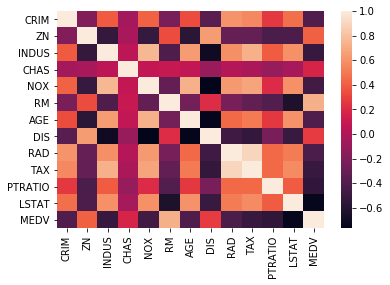

In [22]:
sns.heatmap(houses.corr())

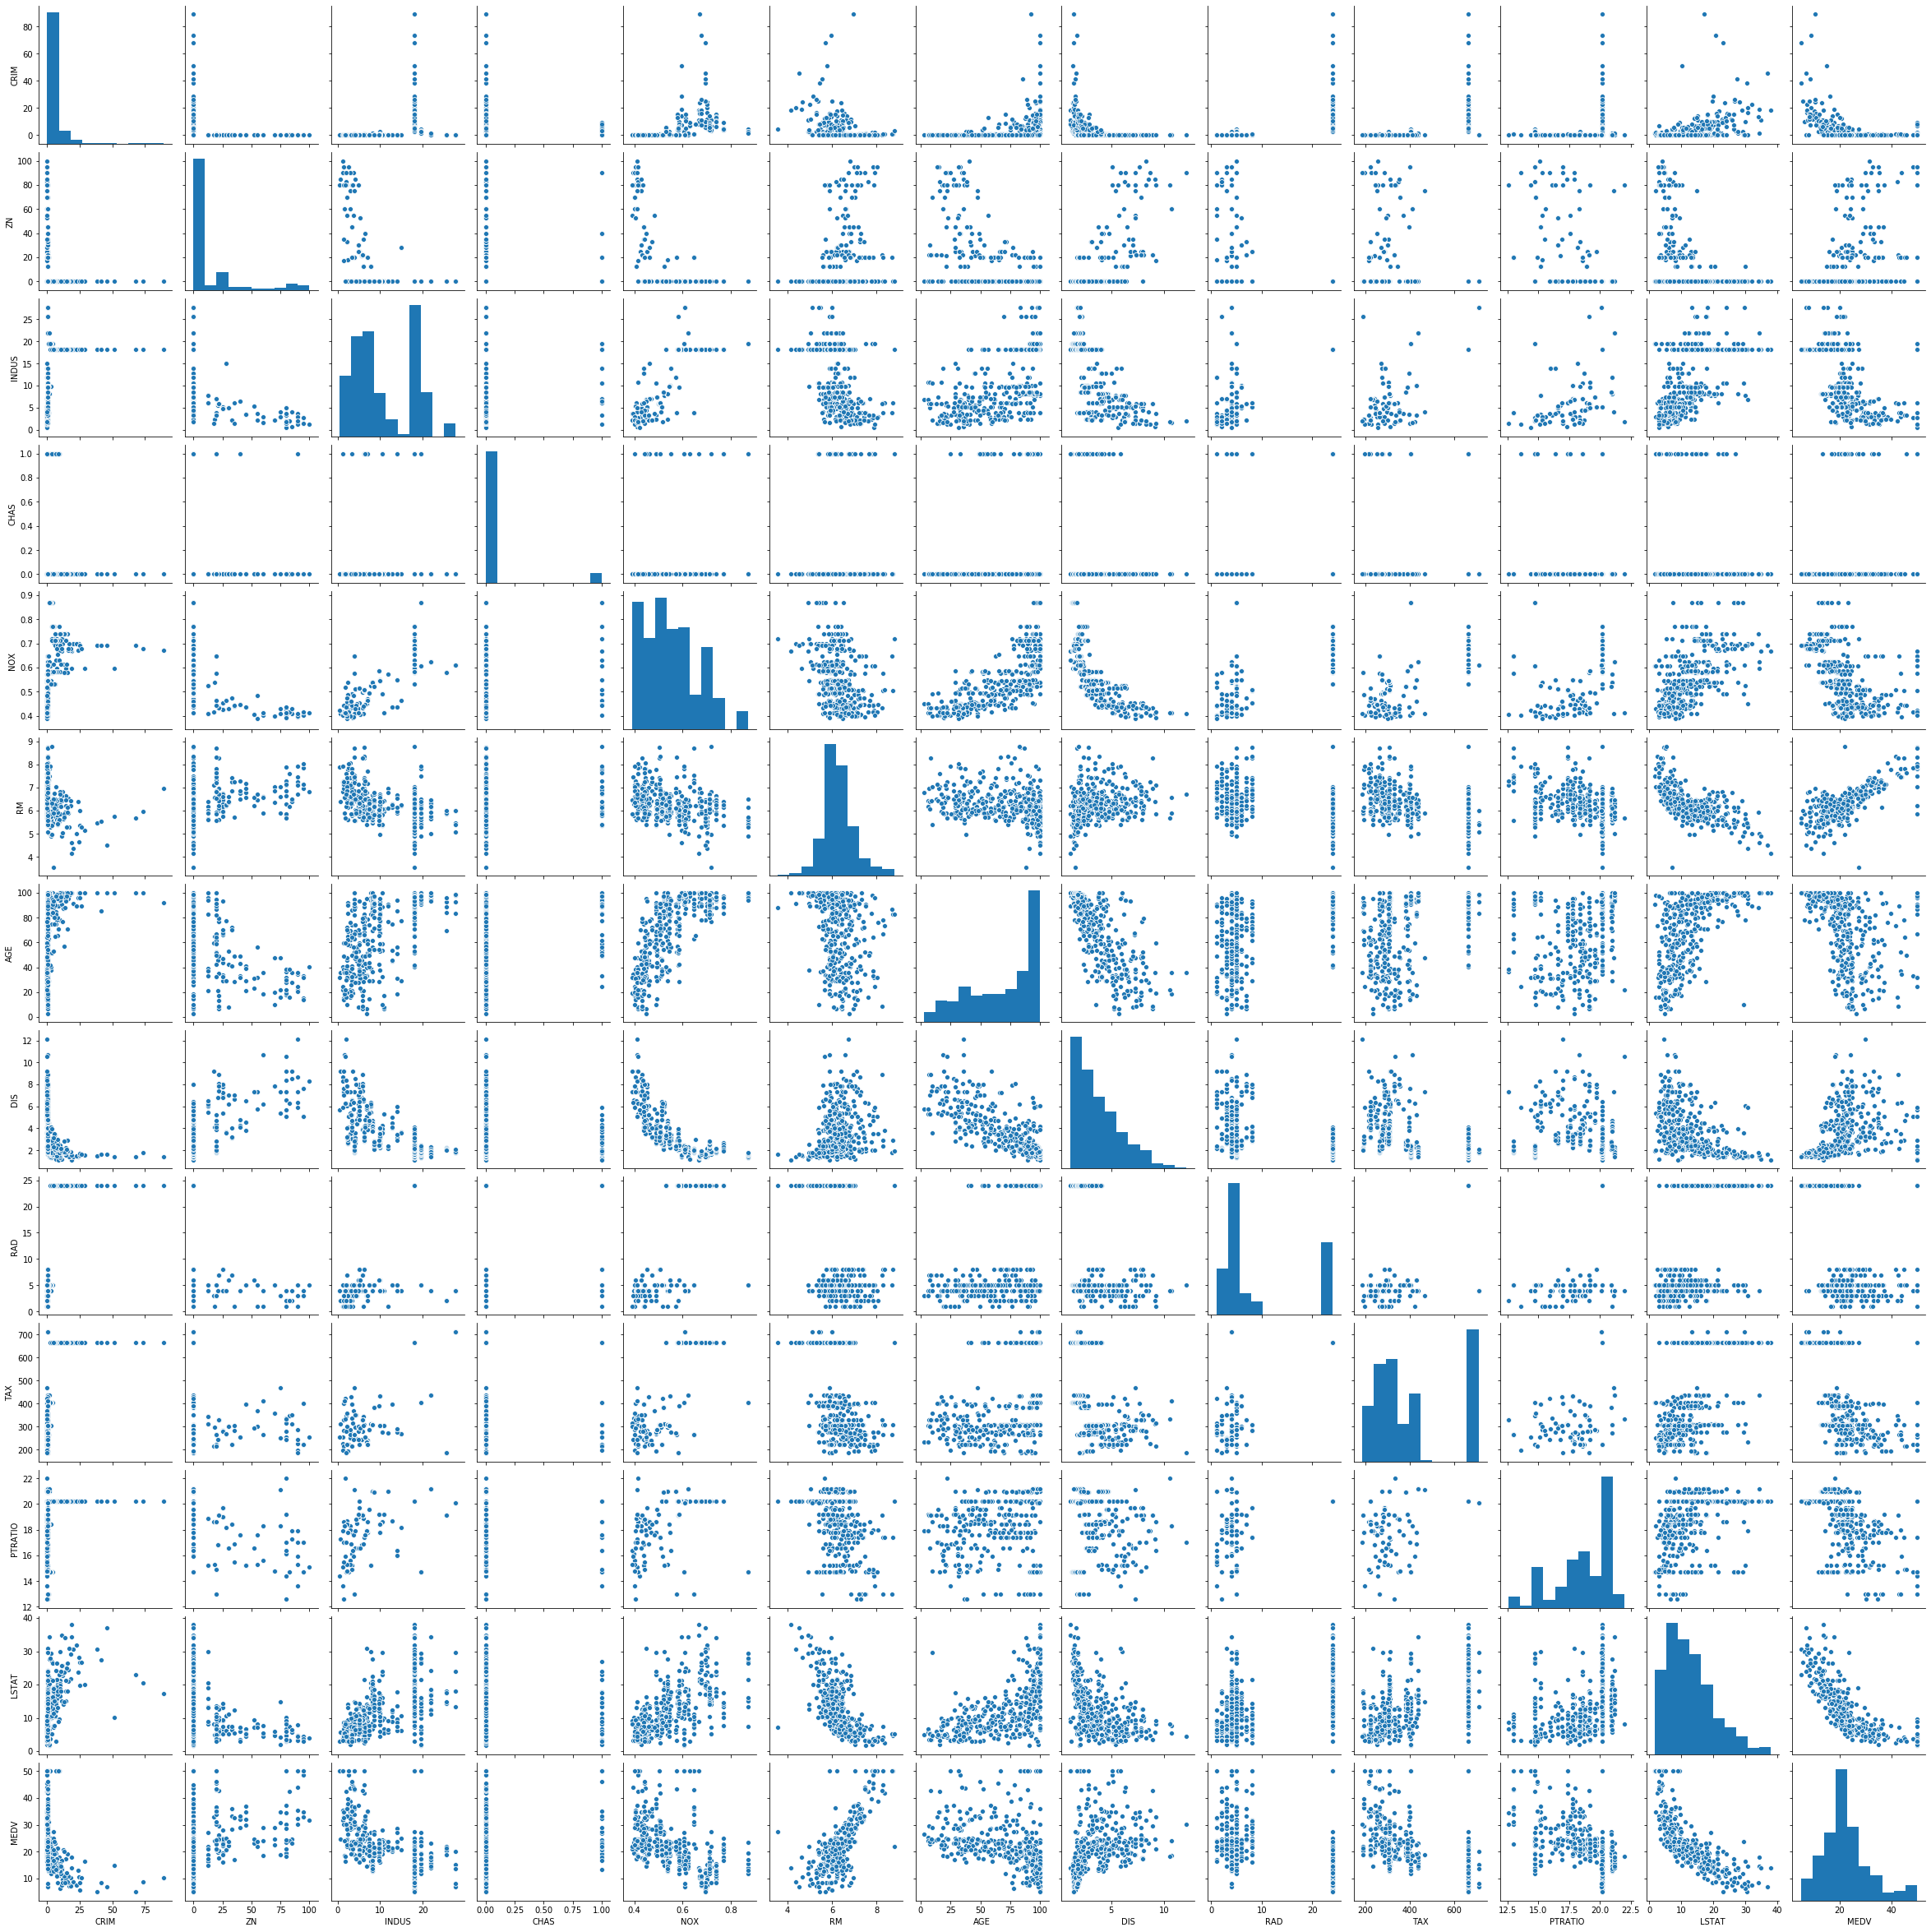

In [23]:
sns.pairplot(houses)

##  Fit a linear regression model

Initialise and fit a linear regression model using scikit-learn

In [24]:
house_regression = LinearRegression()
house_regression.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Inspect the coefficient and intercept of the learned model, and plot the actual values of your dependent vs independent variable against the line of best fit, as in our dummy example above. 

In [25]:
coefficients = house_regression.coef_
coefficients

array([-1.20128855e-01,  4.55439379e-02,  4.99186726e-02,  1.44342007e+00,
       -1.82045243e+01,  4.04484712e+00, -1.74786534e-02, -1.41962844e+00,
        2.59103318e-01, -1.70745700e-02, -8.87849272e-01, -3.96807137e-01])

In [26]:
intercept = house_regression.intercept_
intercept

38.654864654725145

Now calculate the mean squared error of our trained model.

In [27]:
y_train_pred = house_regression.predict(X_train)

In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train,y_train_pred)
rmse = mse**0.5

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Mean squared error: 16.704755
Root mean squared error: 4.087145


Produce a residual plot to assess the goodness of fit of the model.

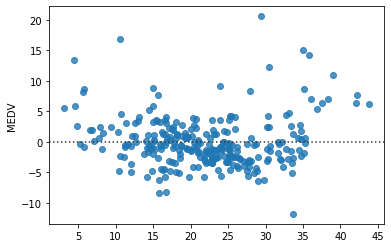

In [29]:
sns.residplot(house_regression.predict(X_train),y_train)        

## Test your linear model on out of sample data

Now we've trained our simple linear model, we can read in our testing data. 

In [30]:
y_pred = house_regression.predict(X_test)

We can also evaluate the accuracy of our model on unseen data, using root mean squared error

In [31]:
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Mean squared error: 29.435424
Root mean squared error: 5.425442


Let's compare this to the performance of the null model.

In [32]:
y_null = np.ones(len(y_test)) * y_train.mean()

mse = mean_squared_error(y_test,y_null)
rmse = mse**0.5

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Mean squared error: 95.890175
Root mean squared error: 9.792353


Discuss the following questions:

* Why is the testing accuracy of the model worse than the training accuracy?

* Does our linear regression model perform better than the null model?